In [62]:
# load the wines dataset (datasets/wines.csv)
# add code here
import pandas as pd

wines_df = pd.read_csv('../../datasets/wines.csv', index_col=0)
wines_df


,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,,,,,,,,,,,,,
14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
13.16,2.36,NaN,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
NaN,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
13.27,4.28,NaN,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2


In [63]:
# do some initial exploratory data analysis
# add code here
wines_df.info()
wines_df.describe

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 14.23 to 14.13
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   malic_acid                    178 non-null    float64
 1   ash                           155 non-null    float64
 2   alcalinity_of_ash             178 non-null    float64
 3   magnesium                     178 non-null    float64
 4   total_phenols                 178 non-null    float64
 5   flavanoids                    178 non-null    float64
 6   nonflavanoid_phenols          178 non-null    float64
 7   proanthocyanins               178 non-null    float64
 8   color_intensity               178 non-null    float64
 9   hue                           178 non-null    float64
 10  od280/od315_of_diluted_wines  178 non-null    float64
 11  proline                       178 non-null    float64
 12  target                        178 non-null    int64  
dtypes: f

<bound method NDFrame.describe of          malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
alcohol                                                                  
14.23          1.71  2.43               15.6      127.0           2.80   
13.20          1.78  2.14               11.2      100.0           2.65   
13.16          2.36   NaN               18.6      101.0           2.80   
NaN            1.95  2.50               16.8      113.0           3.85   
13.24          2.59  2.87               21.0      118.0           2.80   
...             ...   ...                ...        ...            ...   
13.71          5.65  2.45               20.5       95.0           1.68   
13.40          3.91  2.48               23.0      102.0           1.80   
13.27          4.28   NaN               20.0      120.0           1.59   
13.17          2.59  2.37               20.0      120.0           1.65   
14.13          4.10  2.74               24.5       96.0           2.05   

   

In [64]:
# check for missing values in the dataset
# add code here
wines_df.isnull().sum()



malic_acid                       0
ash                             23
alcalinity_of_ash                0
magnesium                        0
total_phenols                    0
flavanoids                       0
nonflavanoid_phenols             0
proanthocyanins                  0
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
target                           0
dtype: int64

In [65]:
# if any, impute the missing values with the mean of the column
# add code here
wines_df = wines_df.copy()
wines_df.fillna(wines_df.mean(),inplace=True)


wines_df.isnull().sum()




malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [66]:
# scale the features using StandardScaler
# add code here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wines_df_scaled = scaler.fit_transform(wines_df.iloc[:, :-1])
wines_df_scaled


array([[-0.5622498 ,  0.254968  , -1.16959318, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.49941338, -0.85342772, -2.49084714, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.02123125,  0.        , -0.2687382 , ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.74474449,  0.        ,  0.15166079, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.22769377,  0.02564475,  0.15166079, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.58316512,  1.43980481,  1.50294326, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [67]:
# perform hierarchical clustering on the dataset
# add code here
from scipy.cluster.hierarchy import linkage

Z = linkage(wines_df_scaled, method='single', metric='euclidean')    
Z[:10]

array([[ 11.        ,  27.        ,   1.00767671,   2.        ],
       [164.        , 167.        ,   1.04792789,   2.        ],
       [104.        , 116.        ,   1.04977634,   2.        ],
       [ 40.        ,  56.        ,   1.0691454 ,   2.        ],
       [ 44.        ,  47.        ,   1.06961261,   2.        ],
       [ 12.        , 178.        ,   1.08503083,   3.        ],
       [ 91.        , 107.        ,   1.088138  ,   2.        ],
       [163.        , 170.        ,   1.09362745,   2.        ],
       [ 23.        ,  24.        ,   1.105591  ,   2.        ],
       [140.        , 142.        ,   1.15720676,   2.        ]])

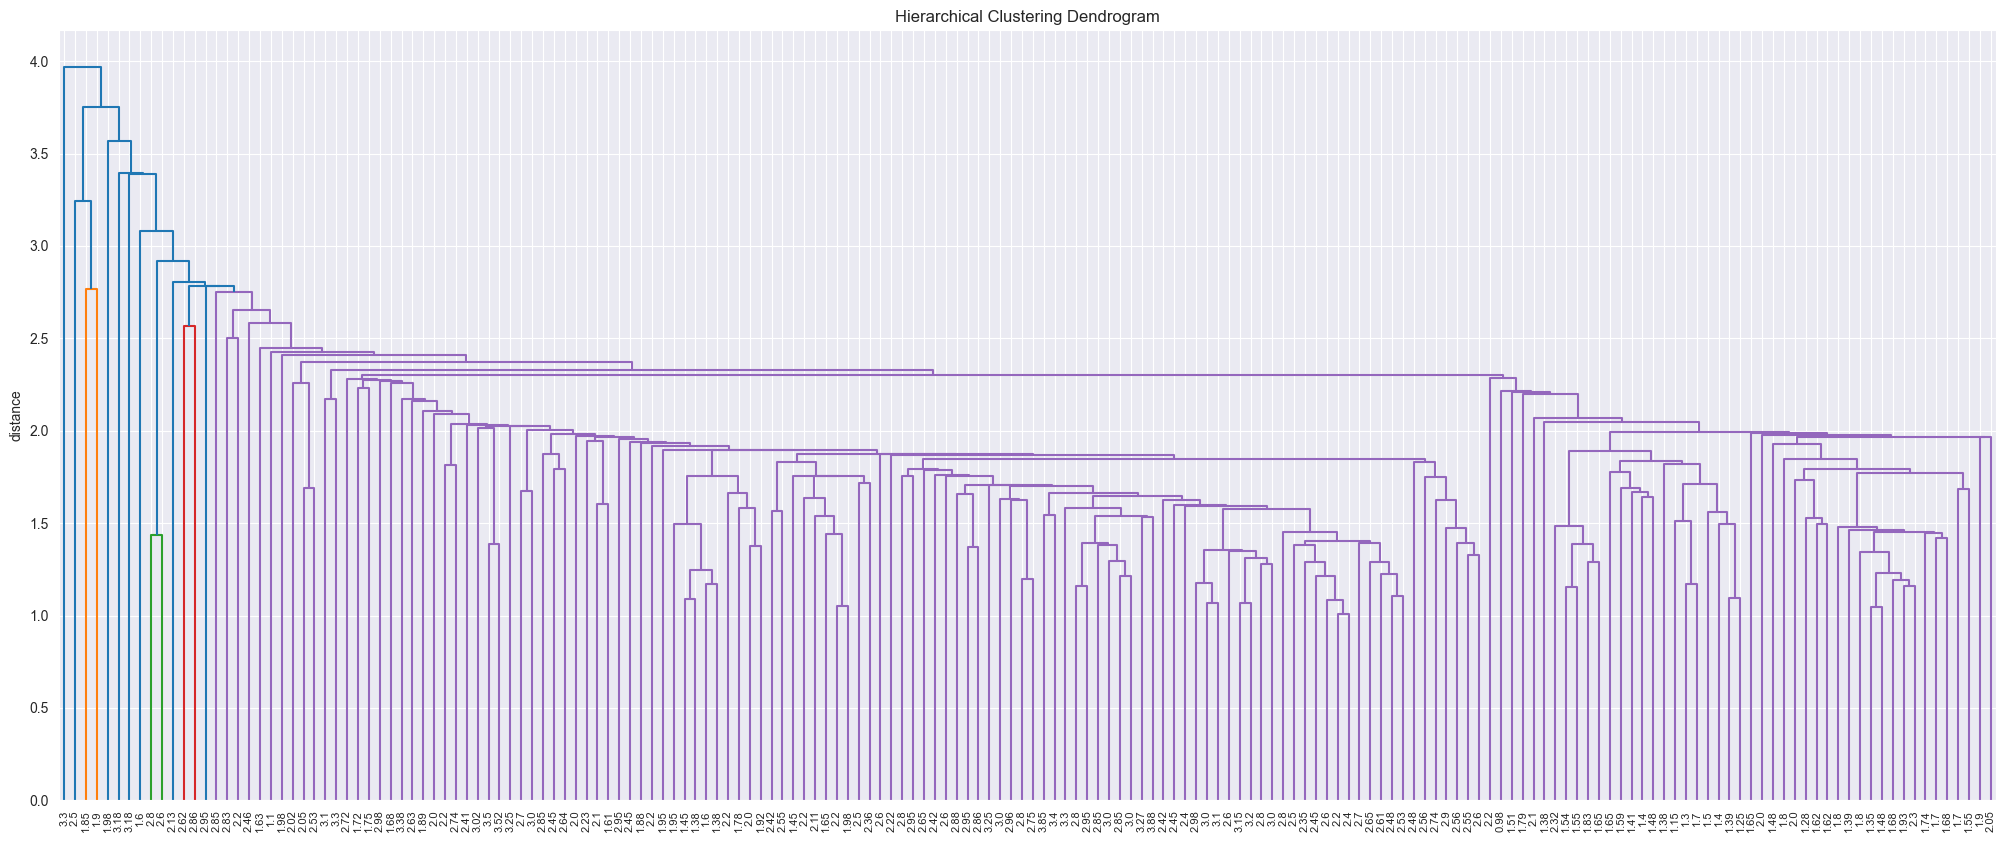

In [68]:
# plot the dendrogram
# add code here
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

plt.figure(figsize=(25, 10))   # Creates a generic figure
dendrogram(                             # Creates the dendogram
            Z,
            labels=np.array(wines_df.iloc[:,4]),    #  select the labels
            leaf_rotation=90.,  # rotates the x-axis labels
            leaf_font_size=8,  # font size for the x-axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')



ax = plt.gca()
xlbls = ax.get_xmajorticklabels()

plt.show()

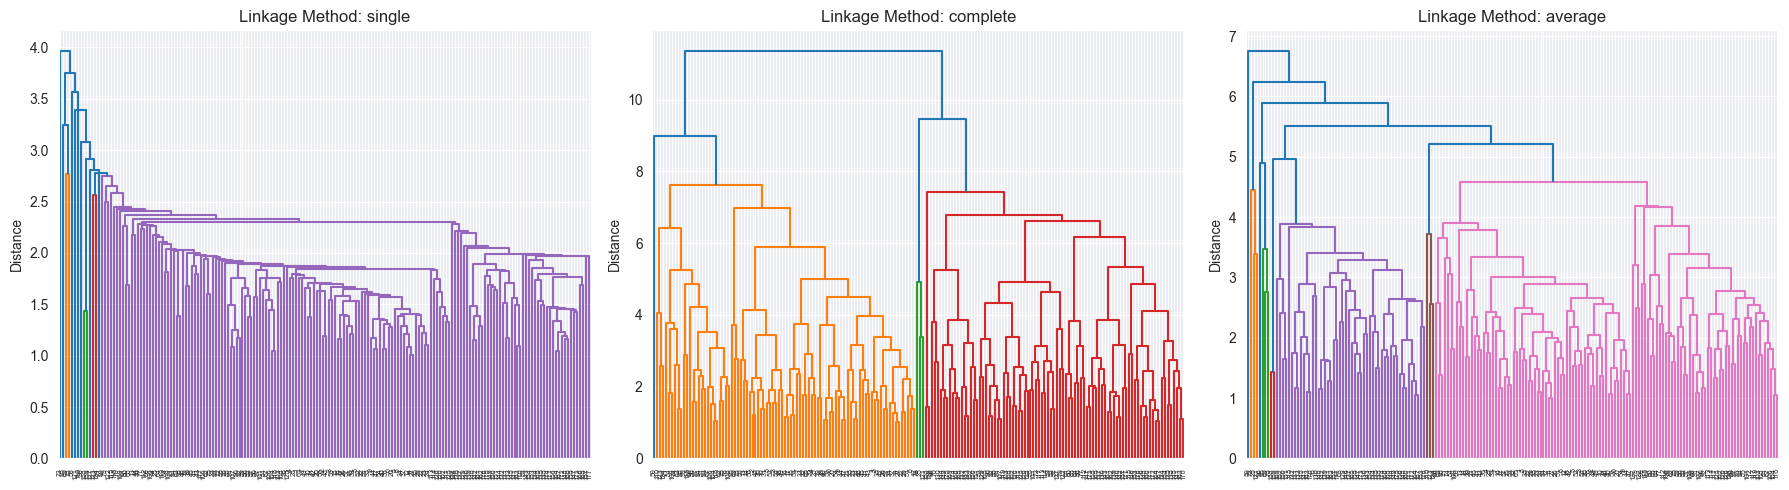

In [69]:
# test different linkage methods and metrics and compare the results
# add code here
# Define the linkage methods to test
linkage_methods = ['single', 'complete', 'average']

# Create subplots
fig, axs = plt.subplots(1, len(linkage_methods), figsize=(18, 5))

# Iterate through each linkage method
for i, linkage_method in enumerate(linkage_methods):
    # Perform hierarchical clustering
    Z = linkage(wines_df_scaled, method=linkage_method)
    
    # Plot dendrogram
    axs[i].set_title(f'Linkage Method: {linkage_method}')
    dendrogram(Z, ax=axs[i])
    axs[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

In [70]:
# perform k-means clustering on the dataset
# add code here
from sklearn.cluster import KMeans

k=3
kmeans_wines = KMeans(n_clusters=k, max_iter=1000, n_init = 10)
## max_iter - number of iterations of the algorithm in each run
## n_init - number of runs from the algorithm - the solution is the one with the best objective function value
kmeans_wines.fit(wines_df_scaled)
labels = kmeans_wines.labels_
centroids = kmeans_wines.cluster_centers_

pd.crosstab(labels, wines_df["magnesium"], rownames=['clusters'])


magnesium,70.0,78.0,80.0,81.0,82.0,84.0,85.0,86.0,87.0,88.0,...,124.0,126.0,127.0,128.0,132.0,134.0,136.0,139.0,151.0,162.0
clusters,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,2,2,0,4,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4,1,1,3,4,9,3,8,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,0,1,1,1,1


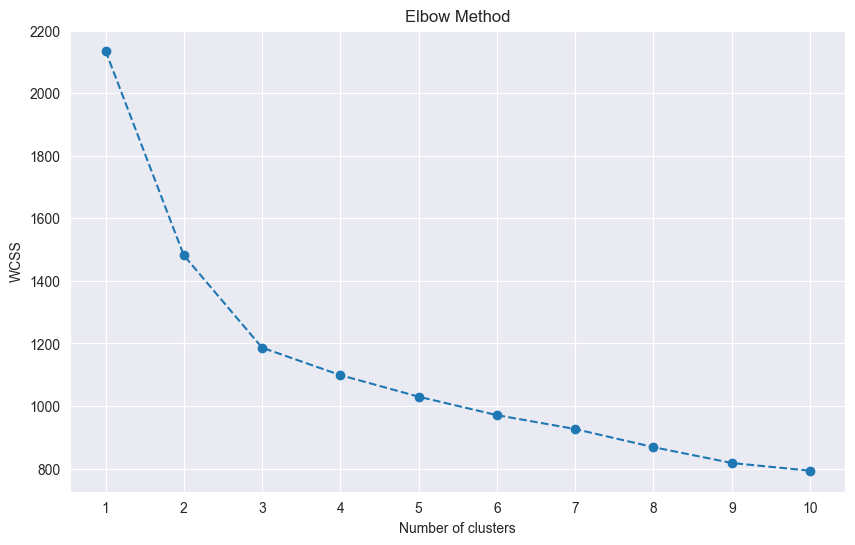

In [71]:
# use the elbow method to find the optimal number of clusters
# add code here
# Calculating WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(wines_df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [72]:
# compare the results of hierarchical and k-means clustering
#